# <h1 align="center"> © RsydMathTech. <h1/>

# Prediction and Decision Making

---

## 1. Tujuan
- Menentukan apakah model yang dibangun **masuk akal** dan dapat digunakan untuk **pengambilan keputusan**.
- Langkah utama:
  1. **Visualisasi** data dan prediksi
  2. **Evaluasi numerik** (MSE, $R^2$)
  3. **Perbandingan antar model** (SLR vs MLR vs Polynomial)

---

## 2. Memastikan Prediksi Masuk Akal
- Contoh: Prediksi harga mobil berdasarkan `highway-mpg`.
  - Prediksi untuk `highway-mpg = 30` → \$13,771 → masuk akal.
- Cek **koefisien** model:
  - `coef_` pada Linear Regression → pengaruh satu unit perubahan fitur.
  - Contoh: satu unit $highway\text{-}mpg$ meningkat → harga mobil turun ~$821$.
- Perhatikan **range data**:
  - Model tidak valid untuk input di luar data observasi.
  - Prediksi negatif atau ekstrem → tanda model tidak sesuai di range tersebut.

---

## 3. Visualisasi Prediksi
- **Regression plot**: melihat tren hubungan independen → dependen.
  - Contoh: harga turun seiring $highway\text{-}mpg$ naik.
  - Non-linear behavior terlihat dari bentuk kurva.
- **Residual plot**:
  - Mengecek error prediksi vs prediksi.
  - Kurva residual → tanda non-linear atau model kurang fit.
- **Distribution plot** (terutama MLR):
  - Bandingkan distribusi prediksi vs distribusi target.

---

## 4. Evaluasi Numerik

### 4.1 Mean Squared Error (MSE)
- Ukuran kuadrat rata-rata selisih antara prediksi dan aktual:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- Semakin kecil MSE → prediksi mendekati target.

### 4.2 Coefficient of Determination ($R^2$)
- Mengukur seberapa dekat data aktual ke garis regresi:
$$
R^2 = 1 - \frac{\text{MSE}_{\text{model}}}{\text{MSE}_{\text{mean}}}
$$
- Interpretasi:
  - $R^2 \approx 1$ → model fit **bagus**, prediksi mendekati data  
  - $R^2 \approx 0$ → model **tidak lebih baik dari rata-rata**  
  - $R^2 < 0$ → model **lebih buruk dari rata-rata** (overfitting / model tidak sesuai)
- Contoh:
  - $R^2 = 0.9986$ → prediksi sangat akurat  
  - $R^2 = 0.9226$ → masih kuat linear relation  
  - $R^2 = 0.806$ → data lebih bervariasi, linear relation masih terlihat  
  - $R^2 = 0.61$ → tren linear lebih sulit terlihat, tapi tetap ada

---

## 5. Membandingkan Model
- **SLR vs MLR**
  - MSE MLR biasanya lebih kecil karena lebih banyak fitur → lebih banyak informasi.
  - $R^2$ MLR lebih tinggi dibanding SLR.
- **Polynomial Regression vs Linear Regression**
  - Polynomial biasanya lebih kecil MSE → menangkap non-linearitas.
  - $R^2$ meningkat jika model sesuai dengan tren data.
- **Catatan penting**:
  - MSE lebih kecil ≠ selalu lebih baik → perhatikan kesesuaian model, overfitting, dan interpretabilitas.

---

## 6. Catatan Umum
- Prediksi digunakan untuk **keputusan nyata** → pastikan model masuk akal.
- Periksa **visualisasi**, **MSE**, dan **$R^2$** sebelum membuat keputusan.
- Nilai $R^2$ minimal yang diterima tergantung bidang studi (beberapa sumber: ≥0.10).  


# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
np.random.seed(42)


# --- 1. SLR Prediction (1 feature) ---

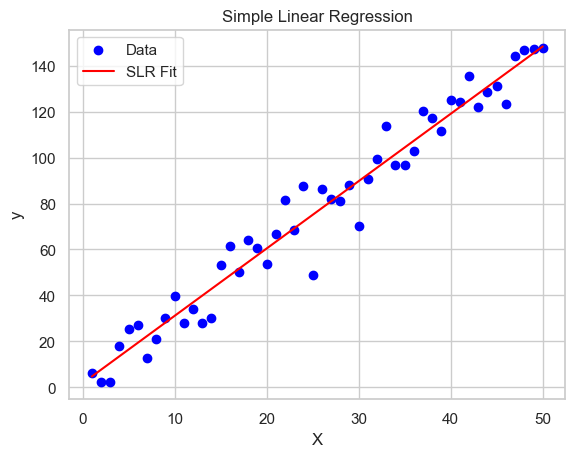

SLR Evaluation:
MSE = 82.11
R²  = 0.93


In [3]:
X_slr = np.linspace(1, 50, 50).reshape(-1,1)
y_slr = 3*X_slr.flatten() + np.random.normal(0, 10, 50)

X_train, X_test, y_train, y_test = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)
yhat_slr = slr.predict(X_test)

# Plot
plt.scatter(X_slr, y_slr, color="blue", label="Data")
plt.plot(X_slr, slr.predict(X_slr), color="red", label="SLR Fit")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Metrics
print("SLR Evaluation:")
print(f"MSE = {mean_squared_error(y_test, yhat_slr):.2f}")
print(f"R²  = {r2_score(y_test, yhat_slr):.2f}")

# --- 1. SLR Prediction () ---

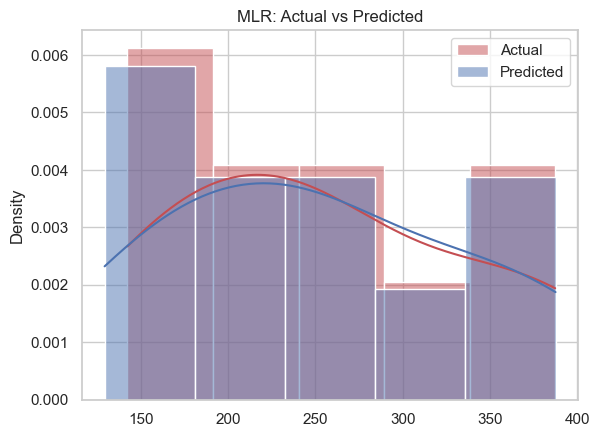

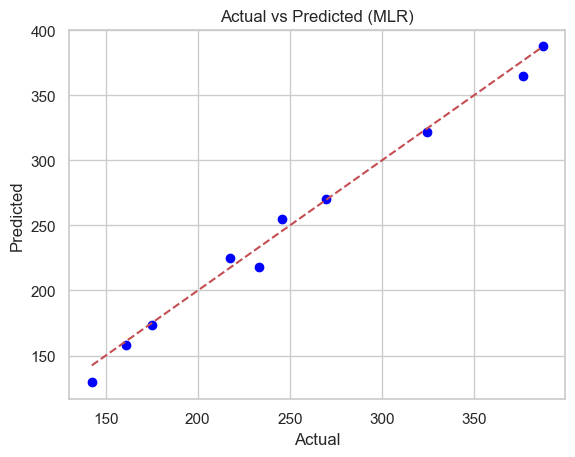

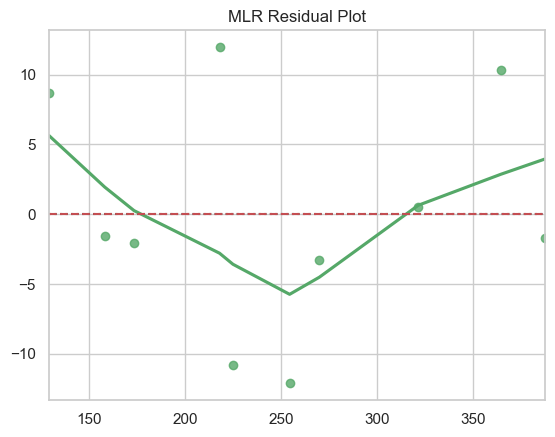

MLR Evaluation:
MSE = 70.99
R²  = 0.99


In [10]:
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)
y_mlr = 2*X1 + 3*X2 + noise
X_mlr = np.column_stack([X1, X2])

X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
yhat_mlr = mlr.predict(X_test)

# Distribution plot
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat_mlr, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("MLR: Actual vs Predicted")
plt.show()

plt.scatter(y_test, yhat_mlr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (MLR)")
plt.show()
# Residual plot
sns.residplot(x=yhat_mlr, y=y_test - yhat_mlr, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("MLR Residual Plot")
plt.show()

# Metrics
print("MLR Evaluation:")
print(f"MSE = {mean_squared_error(y_test, yhat_mlr):.2f}")
print(f"R²  = {r2_score(y_test, yhat_mlr):.2f}")


# --- 3. Polynomial Regression (PLR 2 feature) Pipeline ---


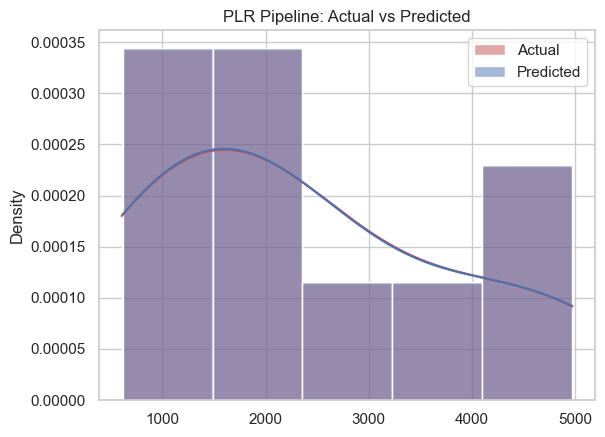

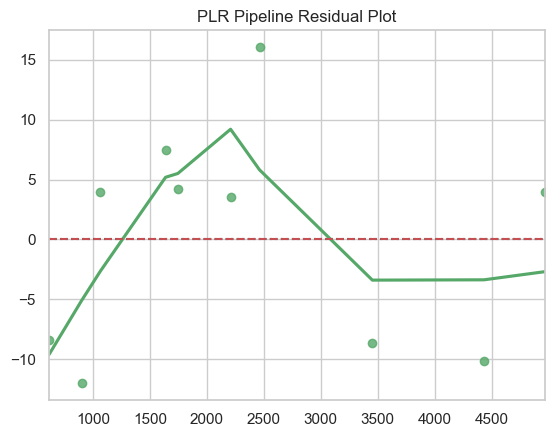

PLR Pipeline Evaluation:
MSE = 77.40
R²  = 1.00


In [7]:
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)

# Tambahin kuadrat biar jelas non-linear
y_plr = 2*X1 + 3*X2 + 0.5*X1*X2 + 0.1*X1**2 + 0.2*X2**2 + noise
X_plr = np.column_stack([X1, X2])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_plr, y_plr, test_size=0.2, random_state=42)

# Pipeline PLR
plr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

# Fit
plr_pipeline.fit(X_train, y_train)
yhat_plr = plr_pipeline.predict(X_test)

# Distribution plot
sns.histplot(y_test, color="r", label="Actual", kde=True, stat="density")
sns.histplot(yhat_plr, color="b", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("PLR Pipeline: Actual vs Predicted")
plt.show()

# Residual plot
sns.residplot(x=yhat_plr, y=y_test - yhat_plr, lowess=True, color="g")
plt.axhline(0, color="r", linestyle="--")
plt.title("PLR Pipeline Residual Plot")
plt.show()

# Metrics
print("PLR Pipeline Evaluation:")
print(f"MSE = {mean_squared_error(y_test, yhat_plr):.2f}")
print(f"R²  = {r2_score(y_test, yhat_plr):.2f}")